In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as pgo
plt.rcParams["figure.figsize"] = 10, 7

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, plot, iplot

import folium as fl

In [2]:
# pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
#Access the cvs file and drop certain column
df = pd.read_excel(r"D:\Open Classroom\Data Files\COVID-19-Data-Analyisis-master\COVID-19-Data-Analyisis-master\Covid cases in India.xlsx")
df.drop(columns = ["S. No."], inplace = True)
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0


In [4]:
#Project a new column to accept the total Cases
df["Total Cases"] = df["Total Confirmed cases (Indian National)"] + df["Total Confirmed cases ( Foreign National )"]
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30


In [5]:
#Determine the total cases of India in that day
overallCases = df["Total Cases"].sum()
print("Total Cases in India -", overallCases)

Total Cases in India - 729


In [6]:
#Project a new column to show the current active cases, eliminating cured and death cases 
df["Active Cases"] = df["Total Cases"] - (df["Cured"] + df["Death"])
df.head()

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19


In [7]:
#Using colors from style inbuilt function to visualize from highest to lowest value
#The darker the cell, the more value it holds
df.style.background_gradient(cmap = "Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [8]:
grpActiveCases = df.groupby("Name of State / UT")
grpActiveCases["Active Cases"].sum().sort_values(ascending = False).to_frame().style.background_gradient(cmap = "Reds")
#grpActiveCases["Active Cases"].value_counts().to_frame().drop(columns = ["Active Cases"])

,Active Cases
Name of State / UT,
Maharashtra,128
Kerala,127
Telengana,44
Rajasthan,40
Gujarat,40
Tamil Nadu,33
Uttar Pradesh,32
Delhi,32
Punjab,28


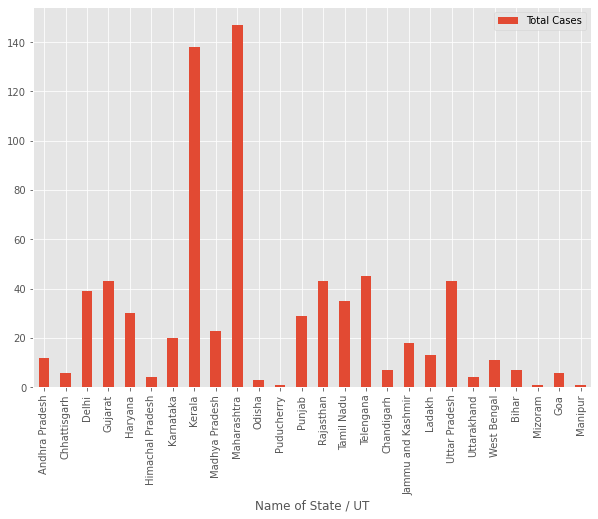

In [9]:
#Pandas inbuilt plotting func
df.plot(kind = "bar", x = "Name of State / UT", y = "Total Cases")

In [10]:
#Plotly visualization
df.iplot(kind = "bar", x = "Name of State / UT", y = "Total Cases")

<BarContainer object of 26 artists>

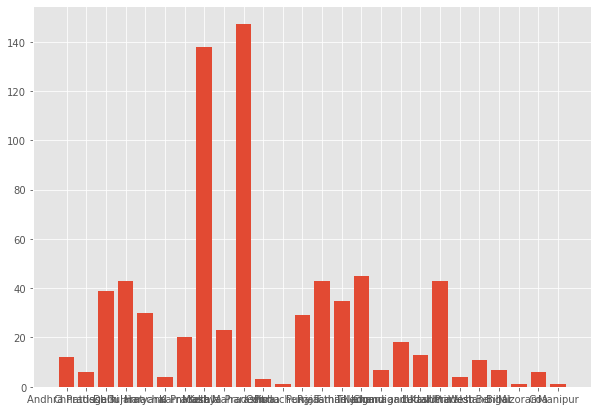

In [11]:
#Matplotlib visualization
plt.bar(df["Name of State / UT"], df["Total Cases"])
#plt.show()

In [12]:
#Object Oriented Visualization with matplotlib and 
#fig = plt.figure()
#dfPlot = fig.add_axes([0, 0, 1, 1])
#dfPlot = plt.bar(df["Name of State / UT"], df["Total Cases"])
df.style.background_gradient(cmap = "Reds")

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128
